## Examples

Here you might find more detailed applications of `tspgrap`.

- [Constructive Heuristics](#constructive)
- [Local Search](#local-search)
- [Grasp](#grasp)

In [1]:
# Imports
import numpy as np
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
from tspgrasp import (
    Grasp, CheapestArc, SemiGreedyArc, CheapestInsertion, SemiGreedyInsertion,
    LocalSearch, SimulatedAnnealing
)

In [2]:
# Create distance matrix with random coordinates
np.random.seed(12)
X = np.random.random((300, 2))
D = squareform(pdist(X))

### Constructive

#### Cheapest Arc

In [3]:
# Instantiate algorithms and solve problem
semi_greedy = SemiGreedyArc(alpha=0.8, seed=12)
greedy = CheapestArc(seed=12)

sol_sg = semi_greedy(D)
sol_greedy = greedy(D)

print(f"Cost Semi-Greedy {sol_sg.cost}")
print(f"Cost Greedy {sol_greedy.cost}")

Cost Semi-Greedy 46.364447780012846
Cost Greedy 16.06749370075501


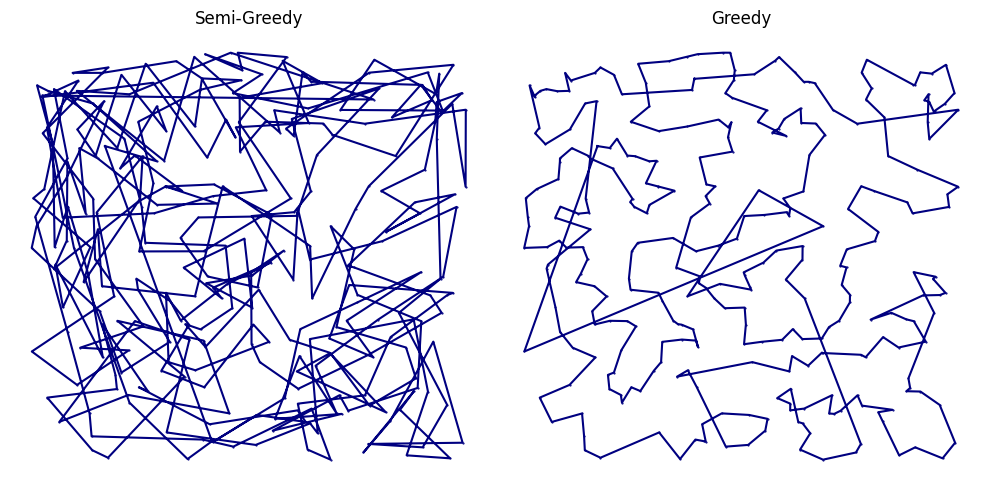

In [4]:
fig, ax = plt.subplots(1, 2, figsize=[10, 5], dpi=100)

tour = np.array(sol_sg.tour)
ax[0].scatter(X[tour, 0], X[tour, 1], color="navy", s=0.3)
ax[0].plot(X[tour, 0], X[tour, 1], color="navy")
ax[0].set_title("Semi-Greedy")
ax[0].axis('off')

tour = np.array(sol_greedy.tour)
ax[1].scatter(X[tour, 0], X[tour, 1], color="navy", s=0.3)
ax[1].plot(X[tour, 0], X[tour, 1], color="navy")
ax[1].set_title("Greedy")

ax[1].axis('off')
fig.tight_layout()
plt.show()

#### Cheapest Insertion

In [5]:
# Instantiate algorithms and solve problem
semi_greedy = SemiGreedyInsertion(alpha=0.8, seed=12)
greedy = CheapestInsertion(seed=12)

sol_sg = semi_greedy(D)
sol_greedy = greedy(D)

print(f"Cost Semi-Greedy {sol_sg.cost}")
print(f"Cost Greedy {sol_greedy.cost}")

Cost Semi-Greedy 15.004827328670835
Cost Greedy 15.666113264739447


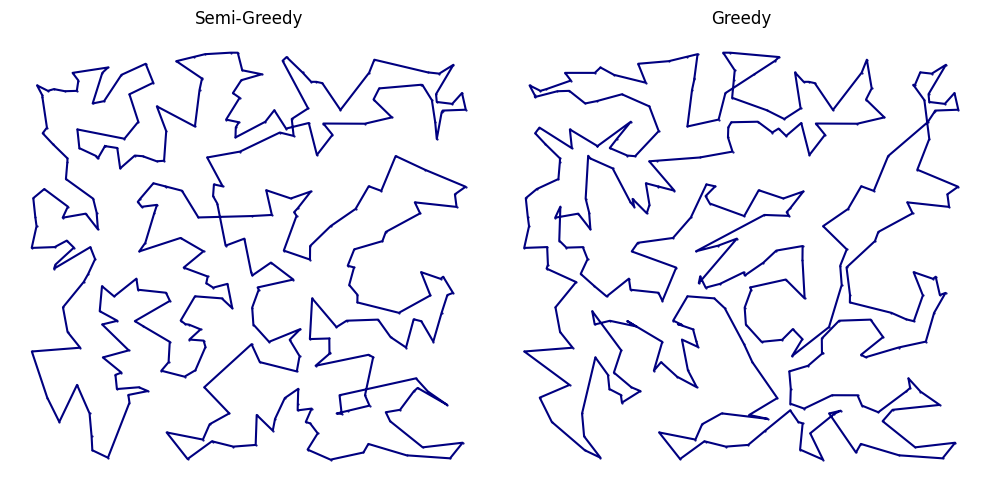

In [6]:
fig, ax = plt.subplots(1, 2, figsize=[10, 5], dpi=100)

tour = np.array(sol_sg.tour)
ax[0].scatter(X[tour, 0], X[tour, 1], color="navy", s=0.3)
ax[0].plot(X[tour, 0], X[tour, 1], color="navy")
ax[0].set_title("Semi-Greedy")
ax[0].axis('off')

tour = np.array(sol_greedy.tour)
ax[1].scatter(X[tour, 0], X[tour, 1], color="navy", s=0.3)
ax[1].plot(X[tour, 0], X[tour, 1], color="navy")
ax[1].set_title("Greedy")

ax[1].axis('off')
fig.tight_layout()
plt.show()

### Local search

In [7]:
# Instantiate algorithms and solve problem
ls = LocalSearch(seed=12)
sa = SimulatedAnnealing(T_start=1e-2, T_final=1e-6, decay=0.999)

start = list(range(D.shape[0]))
sol_ls = ls(start, D)
sol_sa = sa(start, D)

print(f"Cost VNS {sol_ls.cost}")
print(f"Cost Simulated Annealing {sol_sa.cost}")

Cost VNS 13.837749954598257
Cost Simulated Annealing 13.757386372487701


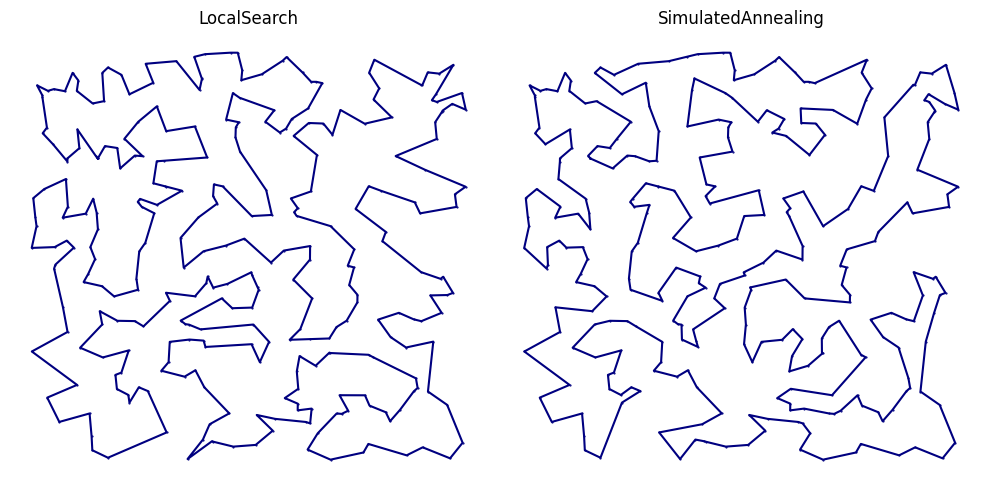

In [8]:
fig, ax = plt.subplots(1, 2, figsize=[10, 5], dpi=100)

tour = np.array(sol_ls.tour)
ax[0].scatter(X[tour, 0], X[tour, 1], color="navy", s=0.3)
ax[0].plot(X[tour, 0], X[tour, 1], color="navy")
ax[0].set_title("LocalSearch")
ax[0].axis('off')

tour = np.array(sol_sa.tour)
ax[1].scatter(X[tour, 0], X[tour, 1], color="navy", s=0.3)
ax[1].plot(X[tour, 0], X[tour, 1], color="navy")
ax[1].set_title("SimulatedAnnealing")

ax[1].axis('off')
fig.tight_layout()
plt.show()

### Grasp

In [9]:
# Instantiate algorithms and solve problem
ls = LocalSearch(seed=12)
semi_greedy = SemiGreedyArc(alpha=0.8, seed=12)
greedy = CheapestArc(seed=12)
grasp_greedy = Grasp(constructive=greedy, local_search=ls, seed=12)
grasp_sg = Grasp(constructive=semi_greedy, local_search=ls, seed=12)

sol_sg = grasp_sg(D, max_iter=1000)
sol_greedy = grasp_greedy(D, max_iter=1000)

print(f"Cost Grasp Semi-Greedy {sol_sg.cost}")
print(f"Cost Grasp Greedy {sol_greedy.cost}")

Cost Grasp Semi-Greedy 13.332905699199468
Cost Grasp Greedy 13.18824071879043


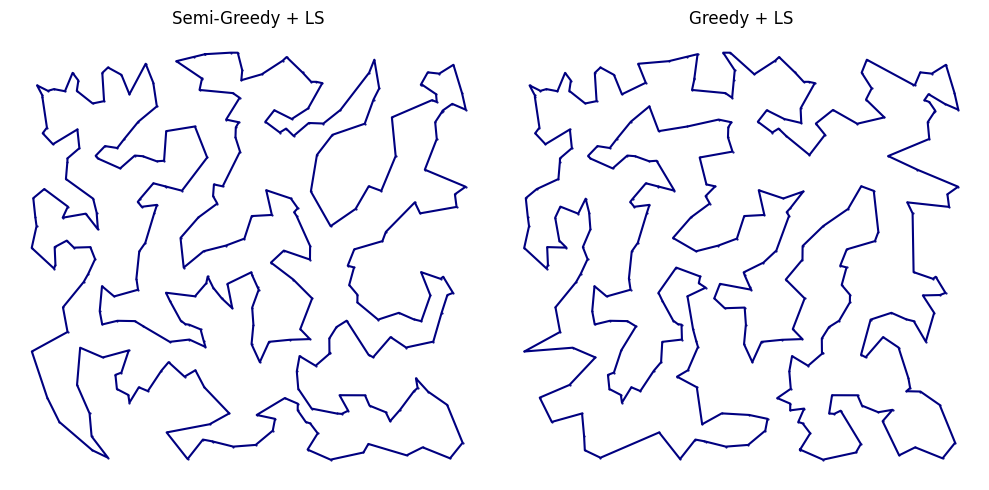

In [10]:
fig, ax = plt.subplots(1, 2, figsize=[10, 5], dpi=100)

tour = np.array(sol_sg.tour)
ax[0].scatter(X[tour, 0], X[tour, 1], color="navy", s=0.3)
ax[0].plot(X[tour, 0], X[tour, 1], color="navy")
ax[0].set_title("Semi-Greedy + LS")
ax[0].axis('off')

tour = np.array(sol_greedy.tour)
ax[1].scatter(X[tour, 0], X[tour, 1], color="navy", s=0.3)
ax[1].plot(X[tour, 0], X[tour, 1], color="navy")
ax[1].set_title("Greedy + LS")

ax[1].axis('off')
fig.tight_layout()
plt.show()